

Business Understanding
----------------------

This dataset was provided by Airbnb, a peer to peer online accommodations marketplace, as a competition on Kaggle.  Specifically, Airbnb provided information about new users in an effort to predict where the new user would make their first booking.  At a high-level, this data is fascinating because it provides a real-world example of user information that is gathered by an online retailer.  As a casual user of the site, the gravity of the level of information being collected may not be realized.  An even farther reach is understanding how that data could be used by the retailer.   

For this project, the purpose of the provided user information is to predict which country will be the user's first booking.  The data collected included demographic data, marketing channels, browser and session details.  This information is likely used by Airbnb to characterize market user categories and to create direct marketing campaigns targeted to the predicted country of booking.

A good prediction algorithm would identify what dependent variables of the dataset contribute the greatest to establishing a high correlation to the country of first booking.  The authors are aiming for a classificaton accuracy of 75% and are hopeful to derive insights to the business from the process in building this model.

In [15]:
# Import Python modules and set settings
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
plt.rcParams['axes.titlesize'] = 1.5*plt.rcParams['font.size']
plt.rcParams['legend.fontsize'] = 1.5*plt.rcParams['font.size']
plt.rcParams['axes.labelsize'] = 1.5*plt.rcParams['font.size']
%matplotlib inline
air=pd.read_csv('C:\\Users\\Anandh\\Data\\train.csv')
session=pd.read_csv('C:\\Users\\Anandh\\Data\\sessions.csv')
pd.options.display.max_rows = 999
pd.set_option("display.max_columns",300)
air.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


# Data Quality

Missing data was found in age, gender, first_affiliate_tracked, and first browser.  Below, you will see the % and counts of missing values for each variable in our dataset.

In [16]:
#please note some items are marked as -unknown--we're going replace those first
for col in air:
    air[col].replace('-unknown-', np.nan, inplace=True)
    air[col].replace('-unknown- ', np.nan, inplace=True)    
    air[col].replace(' -unknown- ', np.nan, inplace=True)
categorical_features = ['gender', 'signup_method', 'signup_flow','language', 'affiliate_channel','affiliate_provider',
                        'first_affiliate_tracked','signup_app','first_device_type','first_browser','country_destination']
for categorical_feature in categorical_features:
    air[categorical_feature] = air[categorical_feature].astype('category')

for col in air:
    print(col + " missing values: " + str(np.count_nonzero(air[col].isnull())) + " : " + str(round((np.count_nonzero(air[col].isnull())/(len(air)*1.0))*100,2))+"% of the Total \n")

print(str(air.id.count()) + ' values in the dataset and ' + str(air.drop_duplicates().id.count()) +' values with duplicates removed: no duplicates.')

id missing values: 0 : 0.0% of the Total 

date_account_created missing values: 0 : 0.0% of the Total 

timestamp_first_active missing values: 0 : 0.0% of the Total 

date_first_booking missing values: 124543 : 58.35% of the Total 

gender missing values: 95688 : 44.83% of the Total 

age missing values: 87990 : 41.22% of the Total 

signup_method missing values: 0 : 0.0% of the Total 

signup_flow missing values: 0 : 0.0% of the Total 

language missing values: 0 : 0.0% of the Total 

affiliate_channel missing values: 0 : 0.0% of the Total 

affiliate_provider missing values: 0 : 0.0% of the Total 

first_affiliate_tracked missing values: 6065 : 2.84% of the Total 

signup_app missing values: 0 : 0.0% of the Total 

first_device_type missing values: 0 : 0.0% of the Total 

first_browser missing values: 27266 : 12.77% of the Total 

country_destination missing values: 0 : 0.0% of the Total 

213451 values in the dataset and 213451 values with duplicates removed: no duplicates.


In [17]:

air.date_account_created=air.date_account_created.astype('Datetime64')
air.timestamp_first_active=pd.to_datetime(air.timestamp_first_active)

air['date_first_booking'] = pd.to_datetime(air['date_first_booking'])
air.gender=air.gender.astype('unicode')
air.signup_method=air.signup_method.astype('str')
air.signup_flow=air.signup_flow.astype('Int64')


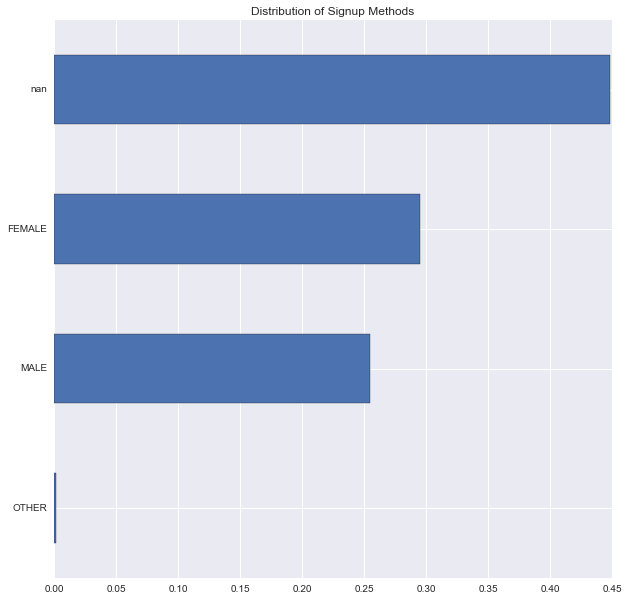

In [18]:


(air.gender.value_counts(sort=True, ascending=True)/air.signup_method.value_counts().sum()).plot(kind='barh', figsize=(10,10),title='Distribution of Signup Methods')


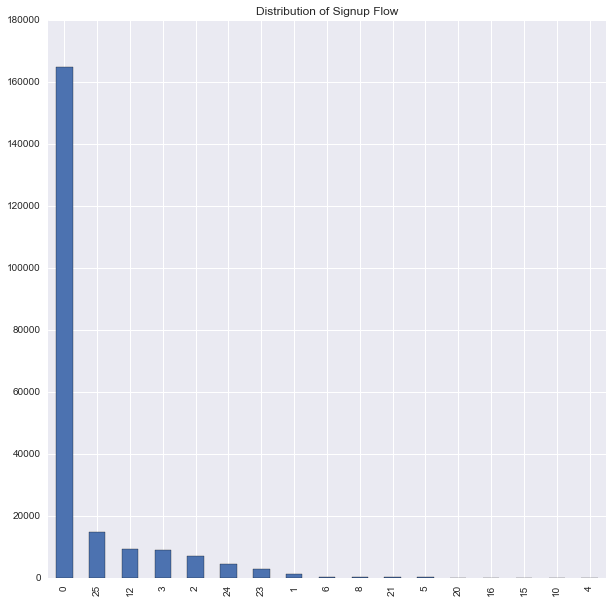

In [4]:
air.signup_flow.value_counts(ascending=False).plot(kind='bar', figsize=(10,10),title='Distribution of Signup Flow')

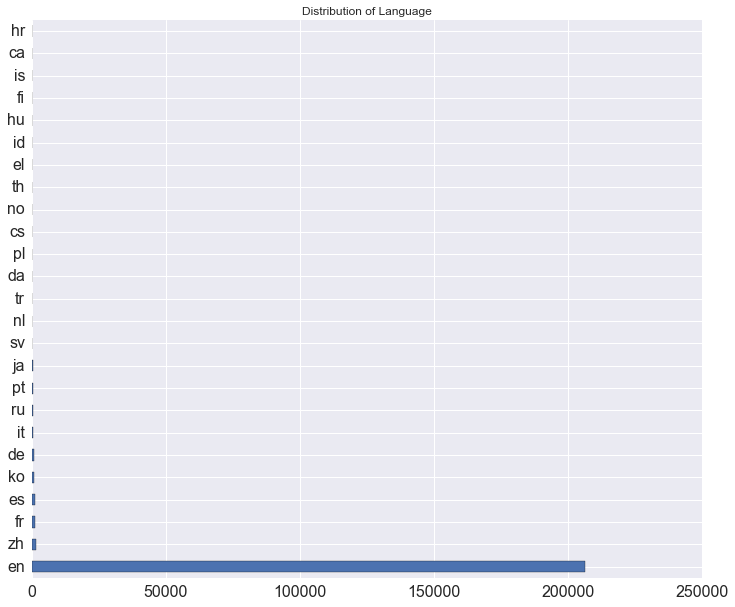

In [5]:
air.language.value_counts(ascending=False).plot(kind='barh', figsize=(12,10),title='Distribution of Language',fontsize=16)

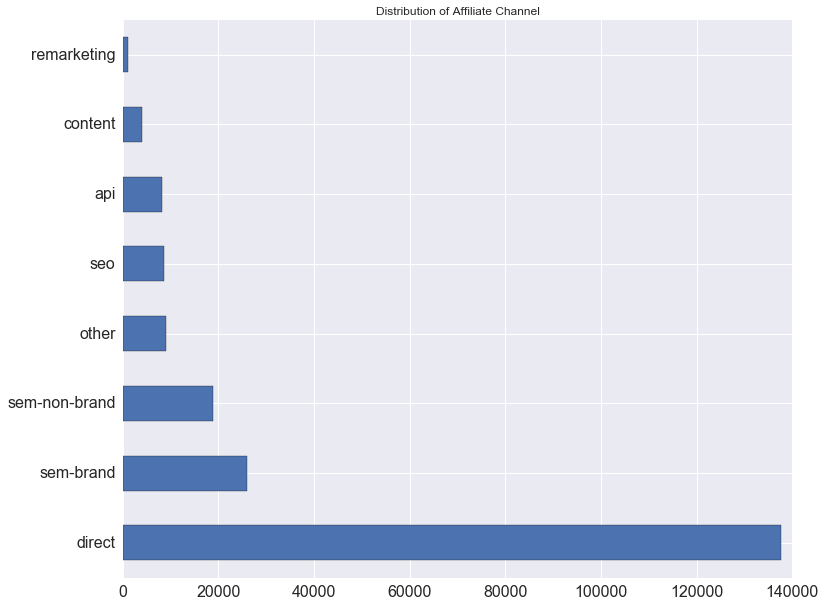

In [6]:
air.affiliate_channel.value_counts(ascending=False).plot(kind='barh', figsize=(12,10),title='Distribution of Affiliate Channel',fontsize=16)

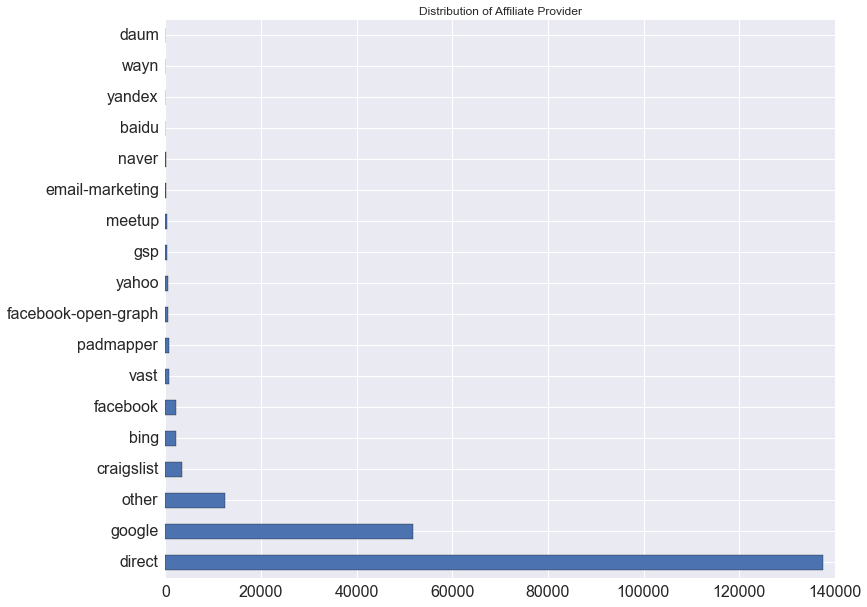

In [12]:
air.affiliate_provider.value_counts(ascending=False).plot(kind='barh', figsize=(12,10),title='Distribution of Affiliate Provider',fontsize=16)

In [ ]:
air.first_affiliate_tracked.value_counts(ascending=False).plot(kind='barh', figsize=(12,10),title='Distribution of First Affiliate Tracked',fontsize=16)

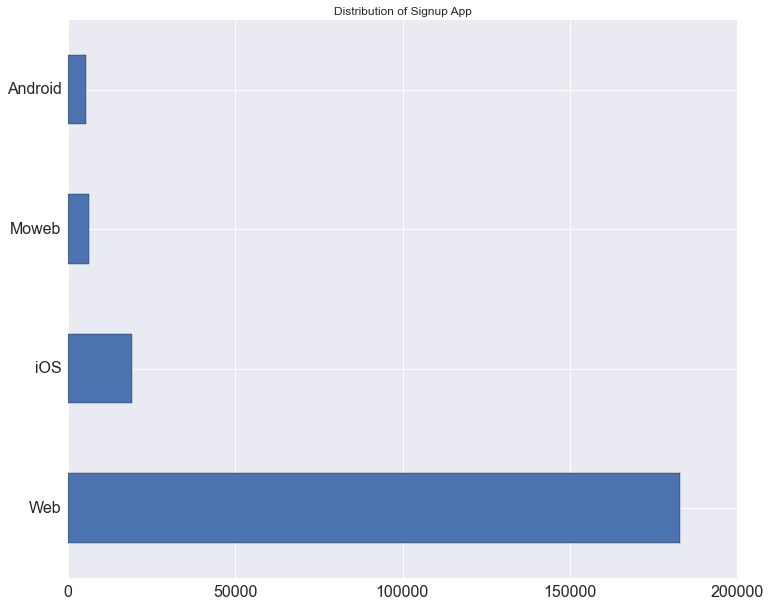

In [13]:
air.signup_app.value_counts(ascending=False).plot(kind='barh', figsize=(12,10),title='Distribution of Signup App',fontsize=16)

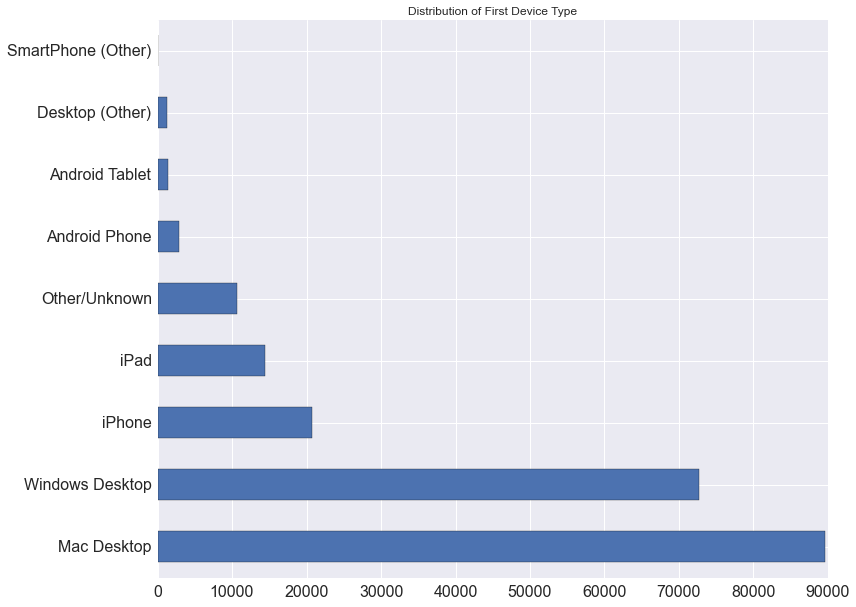

In [14]:
air.first_device_type.value_counts(ascending=False).plot(kind='barh', figsize=(12,10),title='Distribution of First Device Type',fontsize=16)

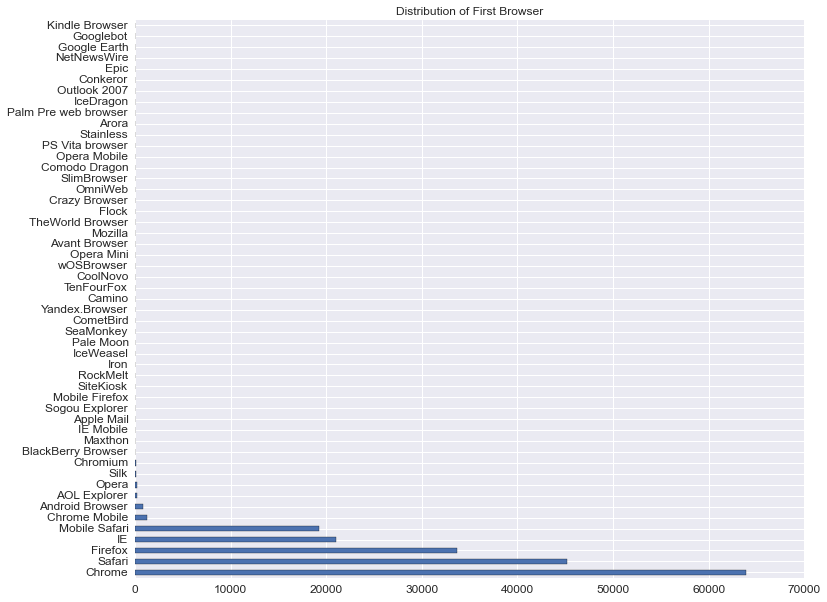

In [16]:
air.first_browser.value_counts(ascending=False).plot(kind='barh', figsize=(12,10),title='Distribution of First Browser',fontsize=12)

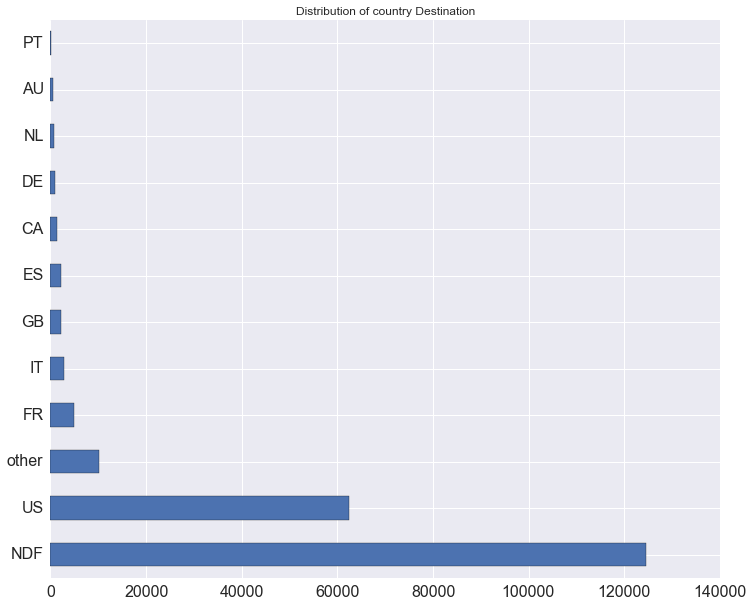

In [17]:
air.country_destination.value_counts(ascending=False).plot(kind='barh', figsize=(12,10),title='Distribution of country Destination',fontsize=16)

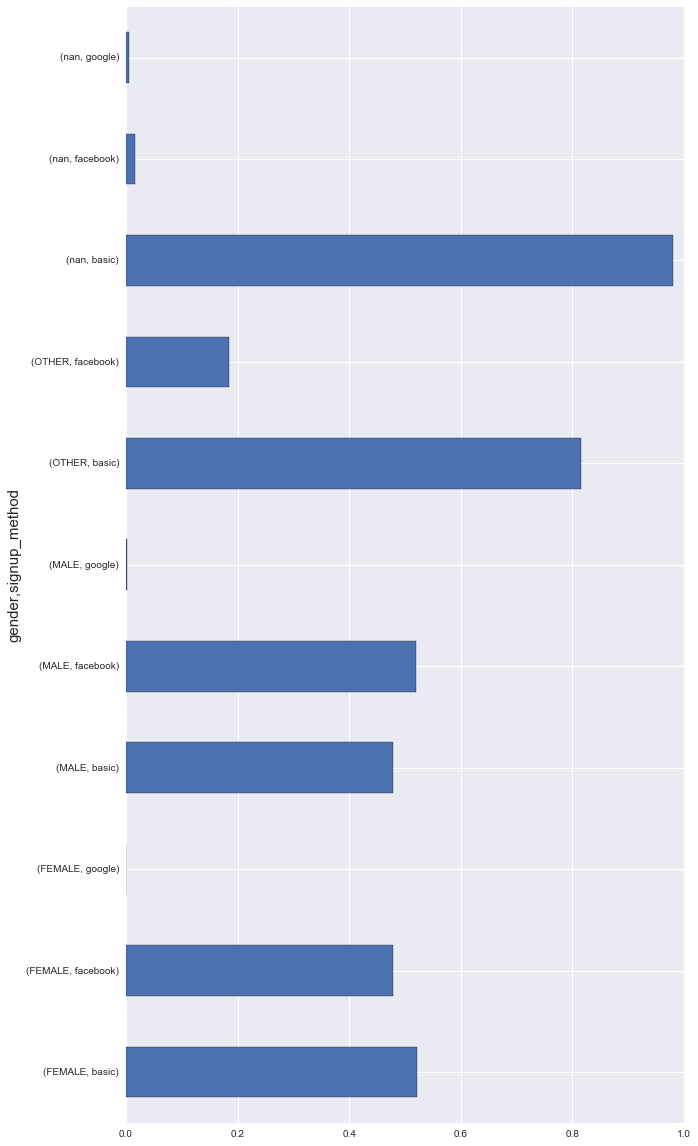

In [50]:
# grouping based on signup method for levels of gender
df_grouped=air.groupby(by=['gender','signup_method'])
df_grouped2=air.groupby(by=['gender'])
(df_grouped.id.count()/df_grouped2.id.count()).plot(kind='barh',figsize=(10,20))

Bar chart of gender and signup method

This bar chart represents the distribution of signup method with respect to gender which shows that google is the least used signup method. 
The other gender type prefers only basic and facebook signup methods with basic method being the most preferred signup method contributing to 81% of the signup method.
Basic signup is prevalent across all gender levels with basic preferred by 98% of people who did not wish to idetify themselves and 81% of other gender. 
Its interesting to note that facebook is preferred by 52% male and basic by 48% which is the opposite of female gender, as in female preferring 48% facebook and 52% basic. And peopele who do not prefer to identify thir gender have not used facebook at all.


first_device_type     Android Phone  Android Tablet  Desktop (Other)  \
gender signup_method                                                   
FEMALE basic               0.007696        0.005597         0.003407   
       facebook            0.012112        0.004778         0.004845   
       google              0.500000        0.062500         0.000000   
MALE   basic               0.008833        0.004762         0.007758   
       facebook            0.014188        0.004200         0.008012   
       google              0.478261        0.086957         0.000000   
OTHER  basic               0.013043        0.000000         0.013043   
       facebook            0.000000        0.000000         0.000000   
nan    basic               0.013471        0.007317         0.005322   
       facebook            0.008737        0.004032         0.006048   
       google              0.505618        0.047191         0.002247   

first_device_type     Mac Desktop  Other/Unknown  SmartPhone (O

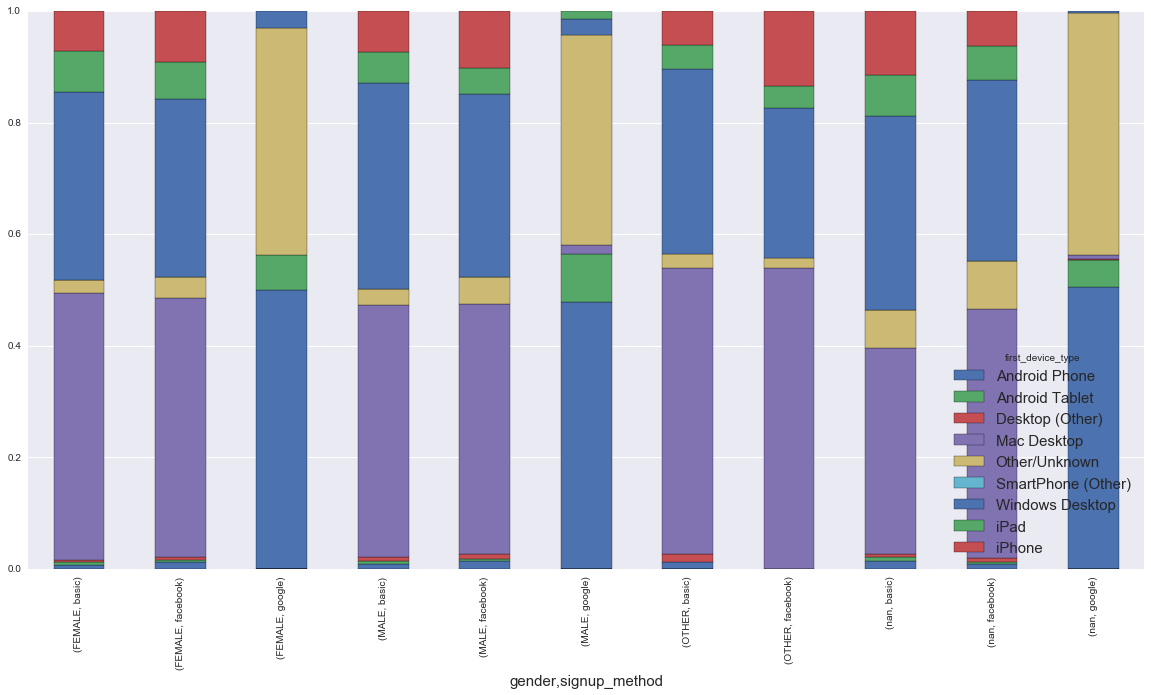

In [52]:
air_imputed_2=air
# the cross tab operator provides an easy way to get numbers of first device type by gender,signup method grouping
device_gender_signup = pd.crosstab([ air_imputed_2['gender'],air_imputed_2['signup_method'] ], 
                       air_imputed_2.first_device_type.astype(str))
device_rate = device_gender_signup.div(device_gender_signup.sum(1).astype(int),
                             axis=0) # normalize the value
print(device_rate)
device_rate.plot(kind='bar', stacked=True, figsize=(20,10))

Bar chart of gender, signup method against the first device type used.
The top table gives percentage of exact values represented in the bar chart. Mac desktop is the preferred device type for all levels of genders and signup method except google. This is followed by Windows desktop.

When signup method is google Android phone device type is preferred followed by other/unknown, Android tablet, Windows Desktop. And use of apple products are almost 0% across all genders. Android phone, Android tablets are not used for other signup methods.
However google is the least used signup method as per previous analysis between gender and signup method.

When signup method is facebook, most preferred device type is Mac Desktop, followed by Windows Desktop, iPhone, iPad. This is mostly applicable for male and female.
Basic signup common across all follows almost same trend of devices for facebook signup.


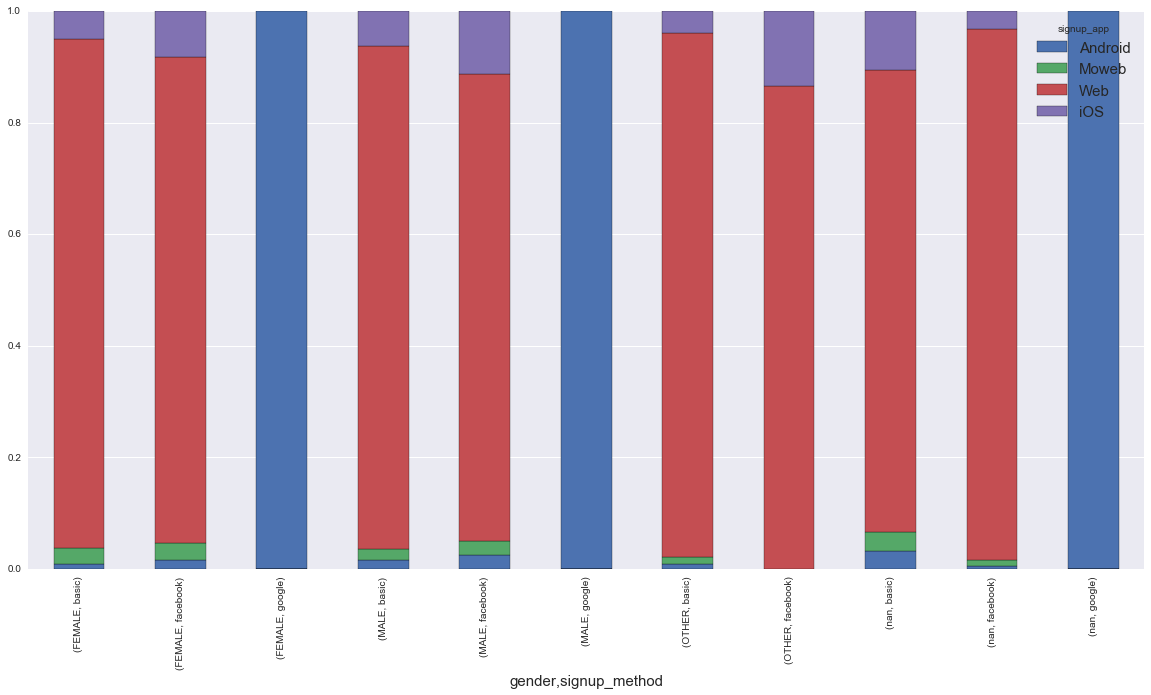

In [53]:
# the cross tab operator provides an easy way to get numbers of signup app by gender,signup method grouping
app_gender_signup = pd.crosstab([ air_imputed_2['gender'],air_imputed_2['signup_method'] ], air_imputed_2.signup_app.astype(str))
app_rate = app_gender_signup.div(app_gender_signup.sum(1).astype(int), axis=0) 
app_rate.plot(kind='bar', stacked=True, figsize=(20,10))

Bar chart of gender, signup method against the signup app used.
Its evident from the bar chart that Web app is most widely used signup app almost more than 82% in all cases. This is followed by iOS, MoWeb and Android. iOS is common among facebook users followed by basic in all genders except people not willing to identify gender.
As observed previously as well google, least preferred signup method uses only Android app and hence not a popular app compared to the other listed apps.

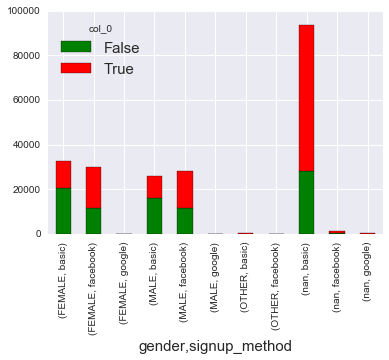

In [54]:
# verifying if account was created before booking by gender and signup method
dates = pd.crosstab([ air_imputed_2['gender'],air_imputed_2['signup_method'] ], 
                       (air.date_account_created > air.date_first_booking).astype(bool))
dates.plot(kind='bar', stacked=True, color=['green','red'])

Bar chart of gender, signup method against date of account creation before booking date
For Male and Female, the most facebook users compared to other gender types when basic signup method is used, they already had account created before booking. But when facebook is used for signup account created before booking is less, so in facebook method, they may use only to check a booking without any account creation.
When basic method was used, most of them had account created before booking in other gender type as well

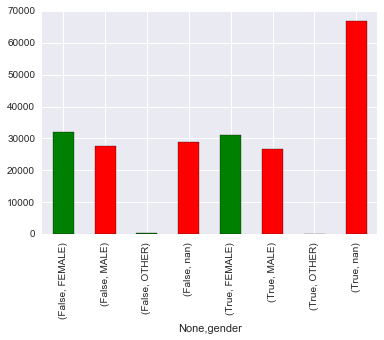

In [27]:
# verifying if account was created before booking by gender
air_grouped_date = air_imputed_2.groupby(by=[air.date_account_created > air.date_first_booking,'gender'])
date = air_grouped_date.gender.count()
date.plot(kind='bar', stacked=True,color=['green','red'])

This bar plot is similar to the one above with crosstab. Here we consider only gender and if account existed before booking. 
Plot shows that there is very little difference between genders and there was almost equal possibilty of account created before booking or account not created before booking.

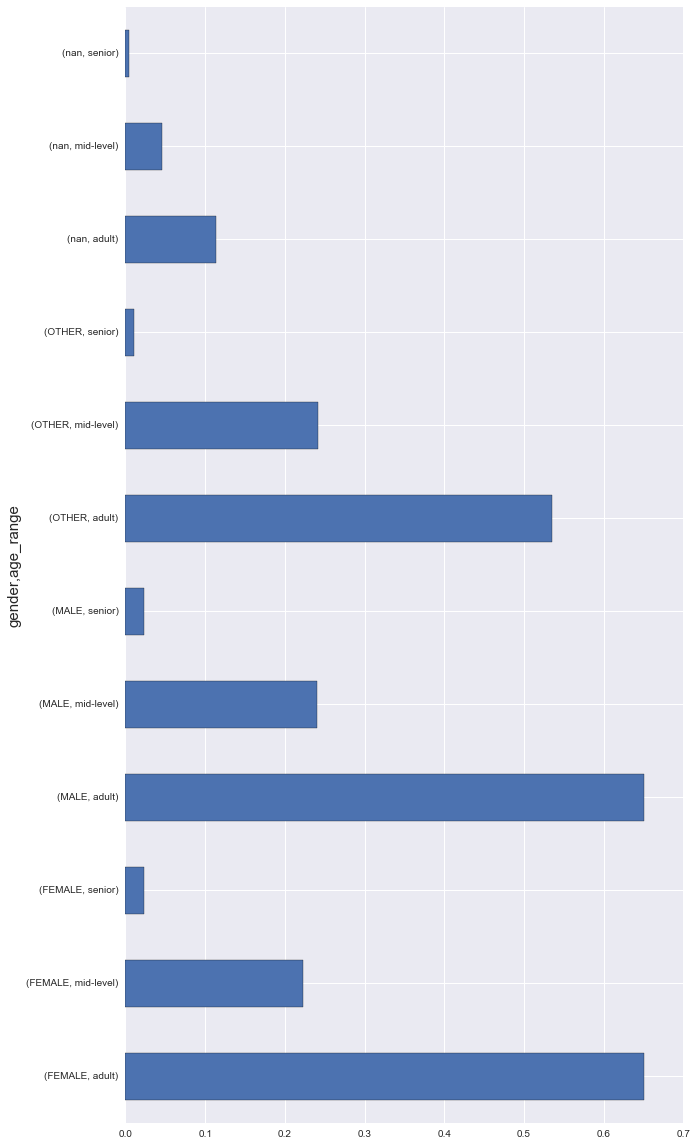

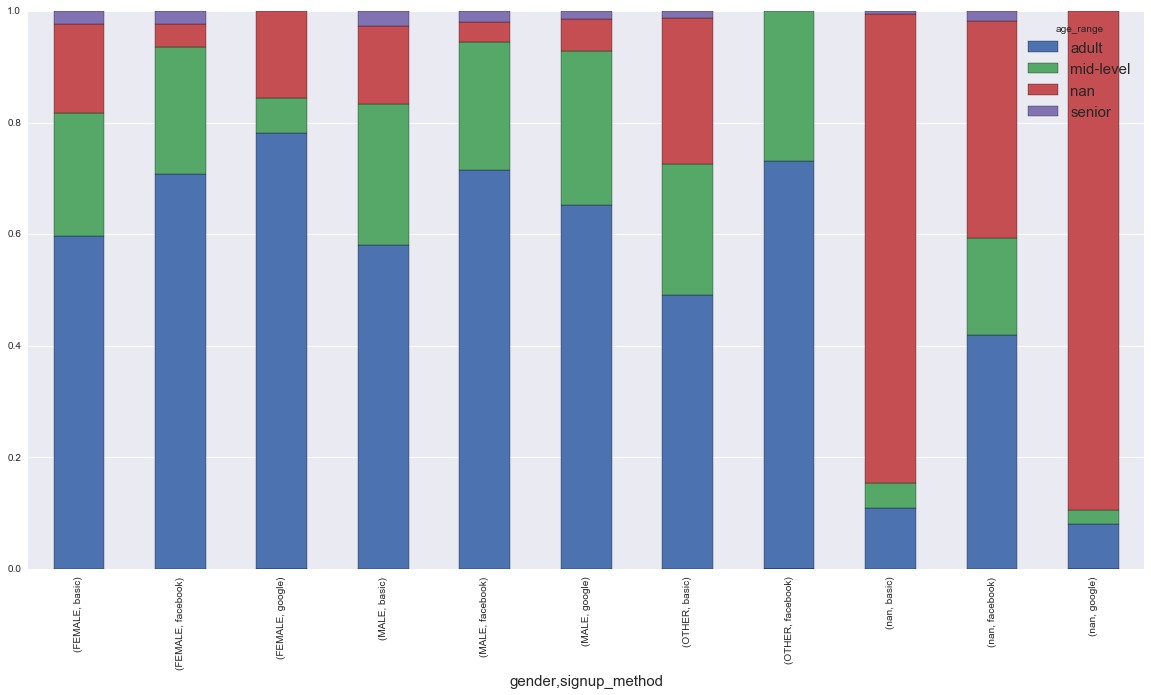

In [55]:
# Convering age values which are not possible as nan
air_imputed_2.air = air.age.replace(to_replace='>100',value=np.nan)
air_imputed_2.air = air.age.replace(to_replace='<18',value=np.nan)
# breaking up the age variable and creating a new variable
air_imputed_2['age_range'] = pd.cut(air_imputed_2.age,[18,40,65,100],3,labels=['adult','mid-level','senior']) 
air_imputed_2.age_range.describe()
# percentage of grouping by gender and age range
df_grouped=air_imputed_2.groupby(by=['gender','age_range'])
df_grouped2=air_imputed_2.groupby(by=['gender'])
(df_grouped.id.count()/df_grouped2.id.count()).plot(kind='barh',figsize=(10,20))
# distribution of age range with gender, signup method grouping
age_gender_signup = pd.crosstab([ air_imputed_2['gender'],air_imputed_2['signup_method'] ], air_imputed_2.age_range.astype(str))
age_rate = age_gender_signup.div(age_gender_signup.sum(1).astype(int), axis=0) 
age_rate.plot(kind='bar', stacked=True,figsize=(20,10))

The bar plot above represents imputed age values as three levels - adult, mid-level, senior vs gender. This plot shows that male, female genders have the same age distribution. Other gender is almost similar with little difference in adult levels of male, female. Another observation is more travel or bookings are done by people in age range of adult irrespective of genders.

The crossplot below shows distribution of gender, signup method vs age_range. This again confirms the observations stated above that adult age range does more bookings or travel across all signup methods also. People whose gender values are unknown have not entered or consciously hidden the age. 

affiliate_channel        api    content      direct      other  remarketing  \
gender language                                                               
FEMALE ca           0.000000   0.000000  100.000000   0.000000     0.000000   
       cs          18.181818   0.000000   54.545455   9.090909     0.000000   
       da          11.111111   0.000000   33.333333   5.555556     0.000000   
       de           6.951872   1.069519   55.614973   1.604278     0.000000   
       el          10.000000   0.000000   40.000000  10.000000     0.000000   
       en           4.590266   1.803848   62.000691   4.751559     0.556296   
       es           3.812317  13.196481   43.988270   3.812317     1.466276   
       fi           0.000000   0.000000   60.000000   0.000000     0.000000   
       fr           4.589372   3.140097   50.241546   1.932367     0.241546   
       hr           0.000000  50.000000   50.000000   0.000000     0.000000   
       hu           0.000000   0.000000   77.777778 

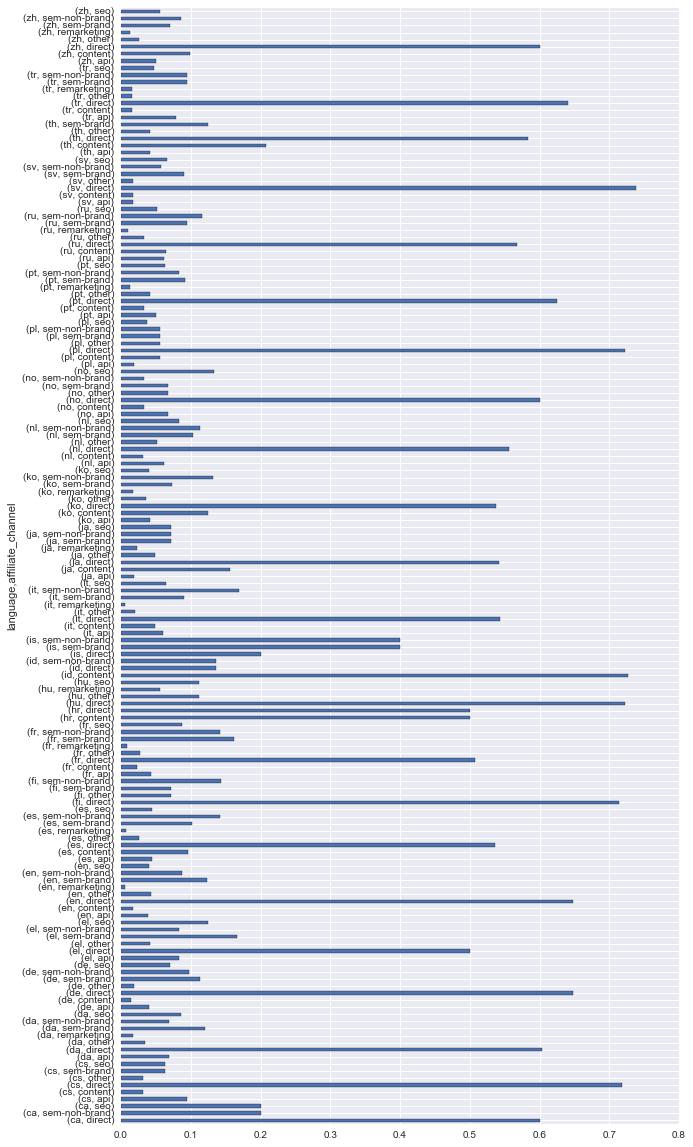

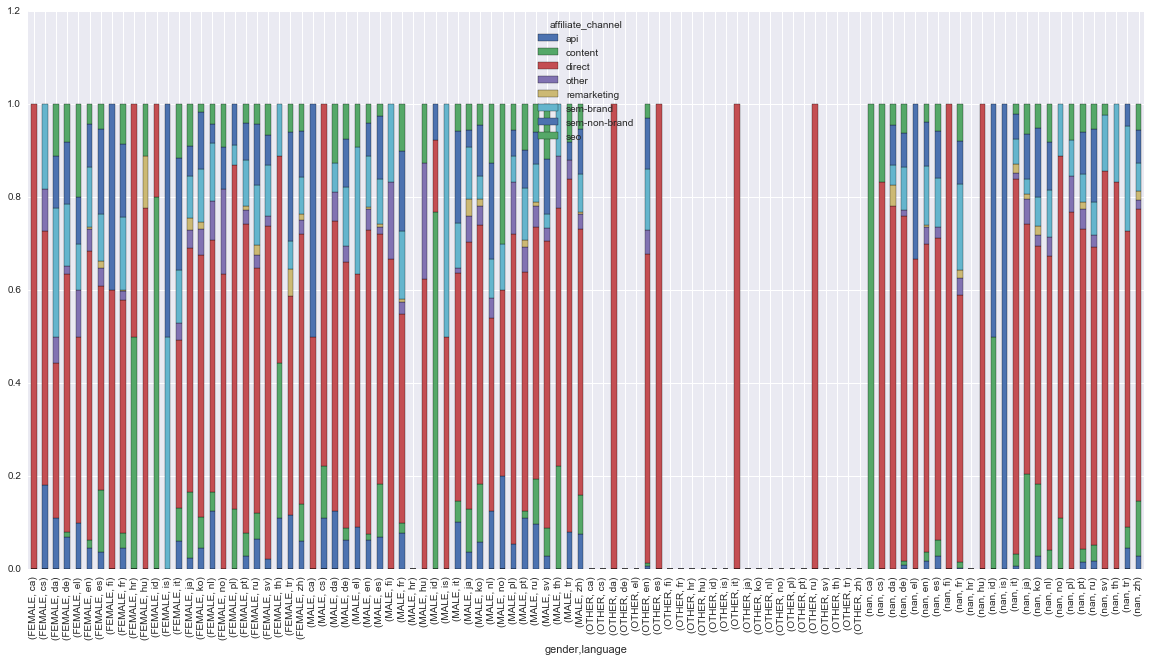

In [46]:
# percentage of grouping by language and affiliate channel
df_grouped1=air_imputed_2.groupby(by=['language','affiliate_channel'])
df_grouped3=air_imputed_2.groupby(by=['language'])
(df_grouped1.id.count()/df_grouped3.id.count()).plot(kind='barh',figsize=(10,20))
# distribution of affiliate channel with language, gender grouping
language_gender = pd.crosstab([ air_imputed_2['gender'],air_imputed_2['language'] ], air_imputed_2.affiliate_channel.astype(str))
language_rate = language_gender.div(language_gender.sum(1).astype(int), axis=0) 
language_rate.plot(kind='bar', stacked=True,figsize=(20,10))

The bar plot above represents language vs affiliate channel, the type of paid marketing startegy used. This plot shows that direct marketing the most used marketing across all languages more than 50% except Indonesian(id), Icelandic(is) with 13% and 20%. Indonesian language users preferred content marketing with 72% and Icelandic preferred sem-brand and sem-non-brand marketings. Not all marketing types were used in all languages. Few languages like Catalan ca, Finnish fi, Croatian hr, Hungarian hu, Indonesian, Icelandic had 2 to 4 marketing methods only.

The crossplot below shows distribution of gender, language vs affiliate channel. This again confirms the observations stated above that direct marketing is preferred across all genders followed by sem-brand and sem-non-brand marketings.
And interesting observation evident from plot is 5 languages by other gender is 100% direct marketing.


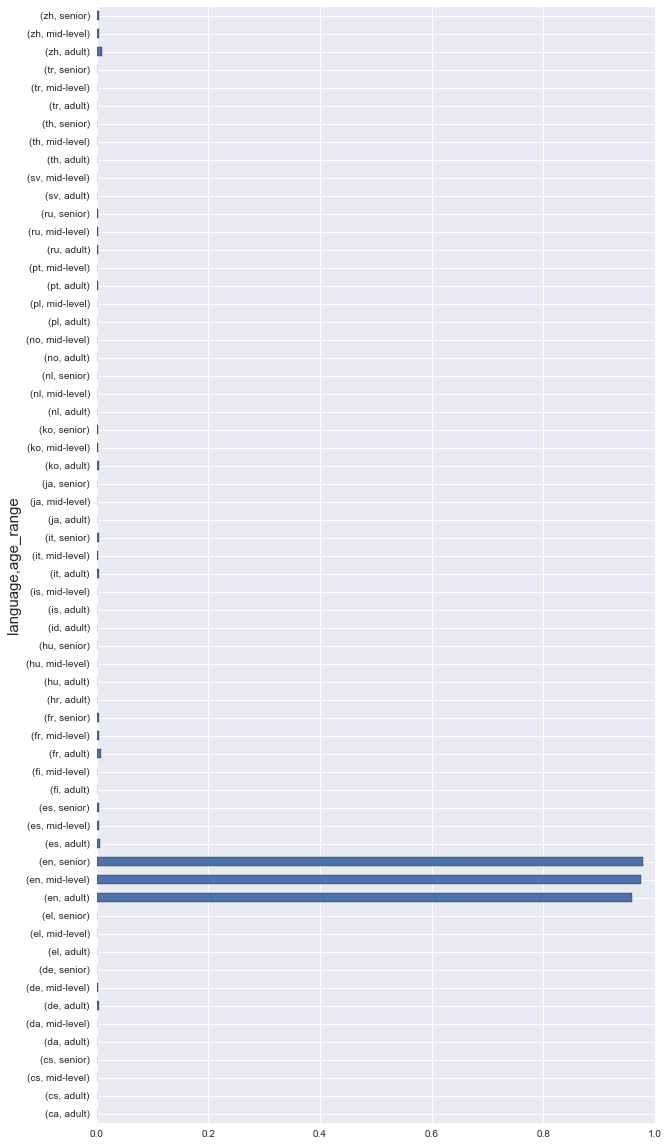

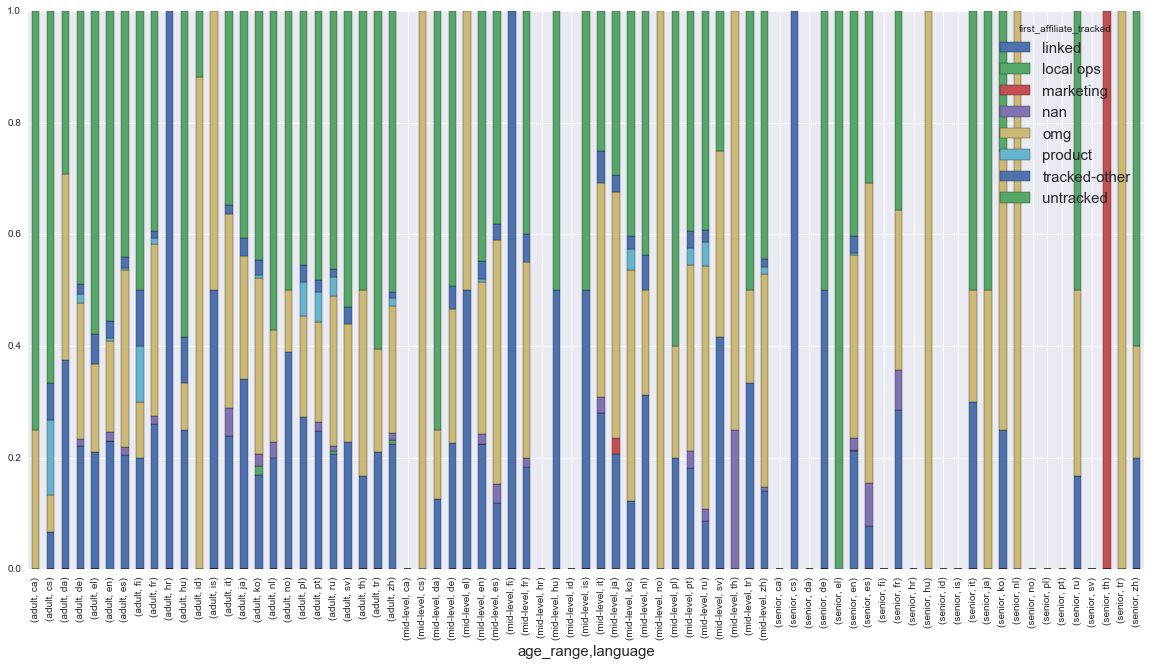

In [49]:
# Convering age values which are not possible as nan
air_imputed_2.air = air.age.replace(to_replace='>100',value=np.nan)
air_imputed_2.air = air.age.replace(to_replace='<18',value=np.nan)
# breaking up the age variable and creating a new variable
air_imputed_2['age_range'] = pd.cut(air_imputed_2.age,[18,40,65,100],3,labels=['adult','mid-level','senior']) 

# percentage of grouping by language and age range
df_grouped=air_imputed_2.groupby(by=['language','age_range'])
df_grouped2=air_imputed_2.groupby(by=['age_range'])
(df_grouped.id.count()/df_grouped2.id.count()).plot(kind='barh',figsize=(10,20))

# distribution of first affiliate tracked with language, age range grouping
age_gender_signup = pd.crosstab([ air_imputed_2['age_range'],air_imputed_2['language'] ], air_imputed_2.first_affiliate_tracked.astype(str))
age_rate = age_gender_signup.div(age_gender_signup.sum(1).astype(int), axis=0) 
age_rate.plot(kind='bar', stacked=True,figsize=(20,10))


Bar plot above shows that english language is widely used (more than 96%) by all age groups. The reason can be easily identified as users in this dataset are from the USA. English is followed by French, Spanish, Chinese, Italian, Korean, Portuguese. This can also be related to people in US from other countries. Language usage is nearly similar across age ranges. And also, senior ranges are missing in languages Portuguese, Polish, Indonesian, Icelandic

The cross plot below shows distribution of age ranges, language, first affliate tracked. It is surprising to notice that marketing is used only by senior with language th and mid level ja and not used in english. Most of the first afiliates were not tracked, which shows distribution of untracked more across age ranges, anguages followed by omg. So omg is the widely distributed first affliate tracked the comes linked and tracked(other)

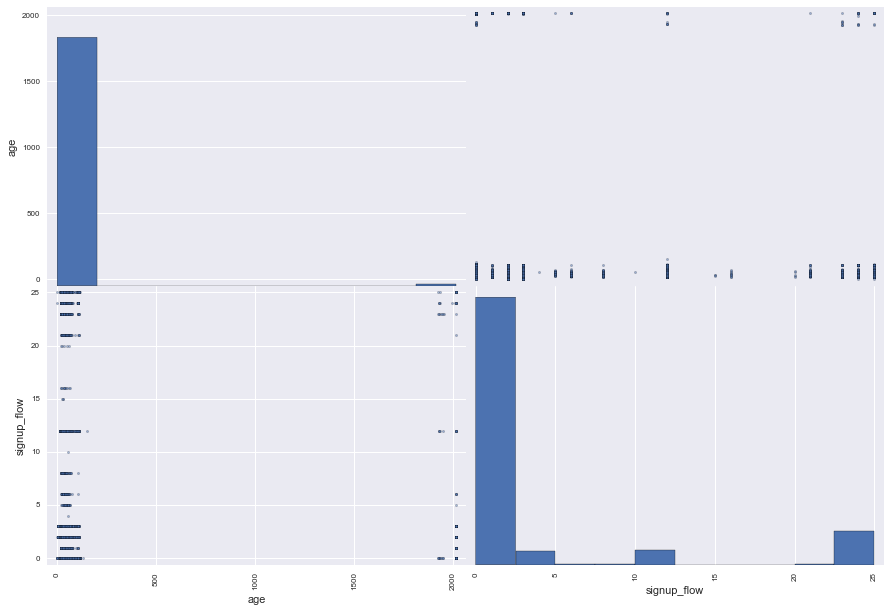

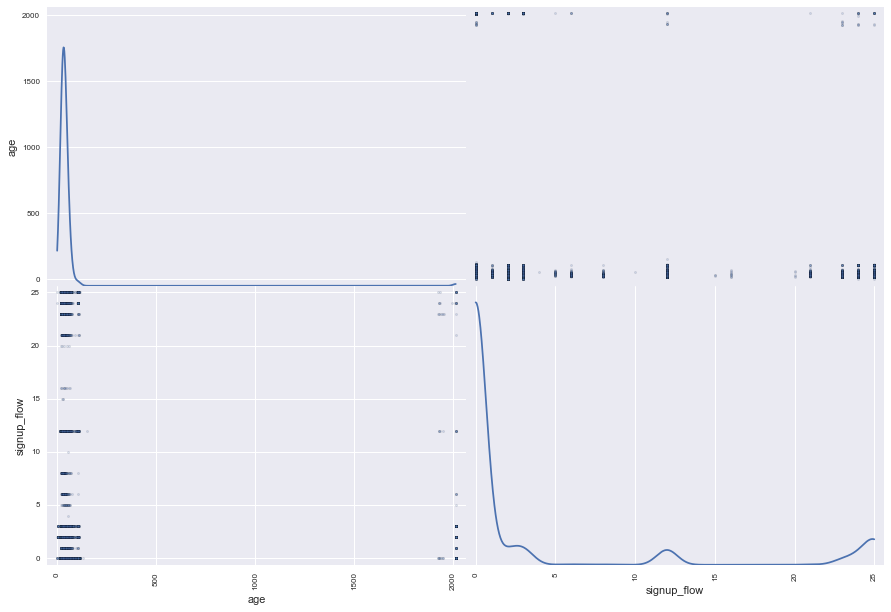

In [41]:
from pandas.tools.plotting import scatter_matrix

ax = scatter_matrix(air_imputed_2,figsize=(15, 10))
bx = scatter_matrix(air,alpha=0.2,figsize=(15, 10),diagonal = 'kde')

In [105]:

tmpdf = pd.get_dummies(data=air,columns=[ 'country_destination','gender','signup_method','language','affiliate_channel',
'affiliate_provider','first_affiliate_tracked','signup_app','first_device_type','first_browser'],
                       prefix={'gender':'gender','country_destination':'country','signup_method':'signup','language':'lang',
                               'affiliate_channel':'channel','affiliate_provider':'provider','first_affiliate_tracked':'affil_tracked',
                               'signup_app':'signup','first_device_type':'first_device','first_browser':'first_browser'})
#from pandas.tools.plotting import scatter_matrix
#scatter_matrix(tmpdf.corr(), figsize=[5,5])
#sns.pairplot(tmpdf,diag_kind=False)
tmpdf.corr()

,age,signup_flow,country_AU,country_CA,country_DE,country_ES,country_FR,country_GB,country_IT,country_NDF,country_NL,country_PT,country_US,country_other,gender_FEMALE,gender_MALE,gender_OTHER,gender_nan,signup_basic,signup_facebook,signup_google,lang_ca,lang_cs,lang_da,lang_de,lang_el,lang_en,lang_es,lang_fi,lang_fr,lang_hr,lang_hu,lang_id,lang_is,lang_it,lang_ja,lang_ko,lang_nl,lang_no,lang_pl,lang_pt,lang_ru,lang_sv,lang_th,lang_tr,lang_zh,channel_api,channel_content,channel_direct,channel_other,channel_remarketing,channel_sem-brand,channel_sem-non-brand,channel_seo,provider_baidu,provider_bing,provider_craigslist,provider_daum,provider_direct,provider_email-marketing,provider_facebook,provider_facebook-open-graph,provider_google,provider_gsp,provider_meetup,provider_naver,provider_other,provider_padmapper,provider_vast,provider_wayn,provider_yahoo,provider_yandex,affil_tracked_linked,affil_tracked_local ops,affil_tracked_marketing,affil_tracked_omg,affil_tracked_product,affil_tracked_tracked-other,affil_tracked_untracked,signup_Android,signup_Moweb,signup_Web,signup_iOS,first_device_Android Phone,first_device_Android Tablet,first_device_Desktop (Other),first_device_Mac Desktop,first_device_Other/Unknown,first_device_SmartPhone (Other),first_device_Windows Desktop,first_device_iPad,first_device_iPhone,first_browser_AOL Explorer,first_browser_Android Browser,first_browser_Apple Mail,first_browser_Arora,first_browser_Avant Browser,first_browser_BlackBerry Browser,first_browser_Camino,first_browser_Chrome,first_browser_Chrome Mobile,first_browser_Chromium,first_browser_CometBird,first_browser_Comodo Dragon,first_browser_Conkeror,first_browser_CoolNovo,first_browser_Crazy Browser,first_browser_Epic,first_browser_Firefox,first_browser_Flock,first_browser_Google Earth,first_browser_Googlebot,first_browser_IE,first_browser_IE Mobile,first_browser_IceDragon,first_browser_IceWeasel,first_browser_Iron,first_browser_Kindle Browser,first_browser_Maxthon,first_browser_Mobile Firefox,first_browser_Mobile Safari,first_browser_Mozilla,first_browser_NetNewsWire,first_browser_OmniWeb,first_browser_Opera,first_browser_Opera Mini,first_browser_Opera Mobile,first_browser_Outlook 2007,first_browser_PS Vita browser,first_browser_Pale Moon,first_browser_Palm Pre web browser,first_browser_RockMelt,first_browser_Safari,first_browser_SeaMonkey,first_browser_Silk,first_browser_SiteKiosk,first_browser_SlimBrowser,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_Yandex.Browser,first_browser_wOSBrowser
age,1.000000,-0.018609,-0.002603,-0.000405,0.002058,-0.002588,-0.001744,0.000381,0.000806,0.012657,0.001554,-0.000210,-0.011513,-0.001355,0.018152,-0.013673,0.003628,-0.007310,0.058958,-0.058753,-0.003194,-0.000623,0.006821,-0.001721,-0.006387,-0.001314,0.013894,-0.002437,-0.001189,-0.007746,-0.000671,0.007918,-0.001612,-0.000387,-0.003573,-0.002619,-0.001896,0.002940,-0.001652,-0.002536,-0.001157,-0.002811,-0.002904,-0.001026,-0.002085,-0.009714,-0.016494,-0.000360,-0.006967,0.005525,0.004765,0.008802,0.010886,-0.002861,-0.001550,0.005655,0.007465,NaN,-0.007604,-0.001605,-0.005564,-0.003423,0.012056,0.001100,-0.003457,-0.001271,-0.007747,-0.003835,0.001110,0.000377,0.001116,-0.001146,0.002385,-0.001561,-0.002709,0.005954,0.006571,0.005324,-0.014027,-0.007064,0.001898,0.022664,-0.024393,0.002274,0.005539,-0.002991,-0.009978,0.010150,0.004111,0.011590,0.007672,-0.016561,0.019210,0.005823,-0.000902,NaN,-0.000051,0.004647,-0.000281,-0.020378,0.007460,-0.001876,-0.000030,-0.000139,NaN,-0.000868,NaN,NaN,0.007272,NaN,NaN,NaN,0.019713,-0.000839,NaN,-0.000587,-0.001000,-0.000266,-0.001476,-0.000273,0.005032,-0.000466,-0.000103,NaN,0.000936,-0.000428,-0.000492,NaN,-0.000320,-0.000498,NaN,-0.001140,0.003724,-0.000702,-0.001207,-0.000236,-0.000428,-0.001497,0.000042,-0.000452,-0.000556,-0.001445,-0.000325
signup_flow,-0.018609,1.000000,-0.007176,-0.013934,-0.014197,-0.017340,-0.032142,-0.019248,

# Relationships Between Variables

In order to produce relationships among the variables, we created a correlation matrix after converting the variables into dummy variables for our many categorical variables.

Unfortunately, the only strong correlation was between Australia being a destination and users using iphone devices:



In [108]:
corr=tmpdf.corr().mul(100)
#corr=corr.fillna(0).astype(int)
#.astype(int)
corr.loc[['signup_Android','signup_Web','Signup_IOS'],['country_AU']]
#import seaborn as sns
#sns.set( font_scale=10.0) 
#sns.clustermap(data=corr, annot=True, fmt='d', cmap='Greens',figsize=[100,200])


,country_AU
signup_Android,-0.637272
signup_Web,0.760678
Signup_IOS,NaN


In [ ]:
session.head()


In [109]:
users=session.groupby('user_id').secs_elapsed.sum()
#users.indexsend 
#pd.DataFrame(users).head()
pd.merge(air,pd.DataFrame(users), left_on='id', right_index=True)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,secs_elapsed
137021,d1mm9tcy42,2014-01-01,1970-01-01 05:35:40.101000936,2014-01-04,MALE,62,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,other,3427529
137022,yo8nz8bqcq,2014-01-01,1970-01-01 05:35:40.101001558,NaT,nan,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF,207842
137023,4grx6yxeby,2014-01-01,1970-01-01 05:35:40.101001639,NaT,nan,NaN,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,Firefox,NDF,1135444
137024,ncf87guaf0,2014-01-01,1970-01-01 05:35:40.101002146,NaT,nan,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF,3755100
137025,4rvqpxoh3h,2014-01-01,1970-01-01 05:35:40.101002619,2014-01-02,nan,NaN,basic,25,en,direct,direct,untracked,iOS,iPhone,NaN,GB,2555
137026,c8mfesvkv0,2014-01-01,1970-01-01 05:35:40.101002626,NaT,nan,NaN,basic,0,en,direct,direct,linked,Web,iPad,Mobile Safari,NDF,1380288
137027,xwxei6hdk4,2014-01-01,1970-01-01 05:35:40.101002742,2014-01-07,FEMALE,32,facebook,0,en,seo,google,linked,Web,iPad,Mobile Safari,US,49673
137028,5f45ro5uzk,2014-01-01,1970-01-01 05:35:40.101003535,NaT,nan,NaN,basic,0,en,direct,direct,untracked,Web,Windows Desktop,Chrome,NDF,605413
137029,ro2stddszp,2014-01-01,1970-01-01 05:35:40.101005503,2014-12-04,nan,19,basic,0,en,sem-brand,google,untracked,Web,Mac Desktop,Safari,other,1284401
137031,qtw88d9pbl,2014-01-01,1970-01-01 05:35:40.101005837,NaT,MALE,25,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,2868205
